In [ ]:
# Copyright (c) 2022 Massachusetts Institute of Technology
# SPDX-License-Identifier: MIT

# Concept Probing for Explainable AI (XAI)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import configs
import torch
from hydra_zen import instantiate
from rai_experiments.utils.visualizations import show_image_row
from rai_toolbox.optim import L1qFrankWolfe

In [3]:
ckpt = "mitll_imagenet_l2_3_0.pt"
model = instantiate(configs.ImageNetModel(ckpt=ckpt))
model.eval()
None

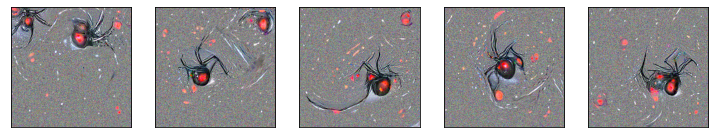

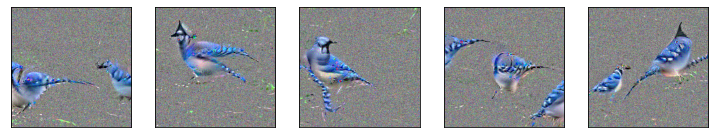

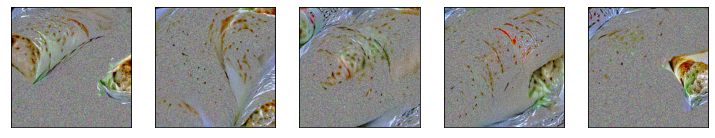

In [4]:
NIMGS = 5
imgs = torch.randn([NIMGS, 3, 224, 224])
imgs = imgs - imgs.min()
imgs = imgs / imgs.max()

# load frank-wolfe solver for additive perturbations
l1fw = instantiate(
    configs.L1FW(
        optimizer=configs.L1q(
            epsilon=20 * (3 * 224 * 224) ** 0.5, q=0.975, pert_q=0.05
        ),
        steps=45,
        targeted=True,
        use_best=False,
    )
)

for tgt in [75, 17, 965]:
    target = torch.tensor([tgt] * NIMGS)

    img_adv, _ = l1fw(
        model=model.cuda(),
        data=imgs.cuda(),
        target=target.cuda(),
    )
    show_image_row([img_adv.detach().cpu().clamp_(0, 1)])